# 샘플 데이터 가져오기

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os

import tensorflow as tf
from tensorflow.keras import datasets, layers 

In [3]:
cifar10 = datasets.cifar10

In [6]:
# 데이터 불러오기(튜플로 받는다)
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

170508288/170498071 [==============================] - 29s 0us/step


# 이미지 데이터 확인하기

In [20]:
cifar10

<module 'keras.api._v2.keras.datasets.cifar10' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\cifar10\\__init__.py'>

In [7]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
'''
50000만장 의 학습용  이미지 32 x 32 
10000만장 의 테스트용  이미지 32 x 32 
'''
None

In [9]:
train_x.ndim # 4차원

4

In [12]:
train_x[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [13]:
np.unique(train_x) # 1 부터 255까지?

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [14]:
train_y.shape

(50000, 1)

In [16]:
image = train_x[0]
image.shape # 32 x 32 rgb 값

(32, 32, 3)

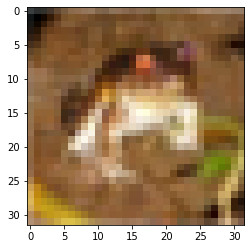

In [17]:
plt.imshow(image, 'gray')
plt.show()  # 뭔사진이지...

In [18]:
train_y[0] # 6으로 판정? 

array([6], dtype=uint8)

In [37]:
np.unique(train_y, return_counts=True) # 0 부터 9까지?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

## Channel 관련
[Batch Size, Height, Width, Channel]

- Channel 이 있어야 한다  (없으면 만들어 주어야 한다)
    - Grayscale 이면 1
    - RGB 이면 3 

In [26]:
train_x.shape # 다 있네

(50000, 32, 32, 3)

In [27]:
disp = train_x[0]
disp.shape

(32, 32, 3)

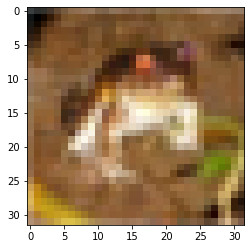

In [28]:
plt.imshow(disp, 'gray')
plt.show()

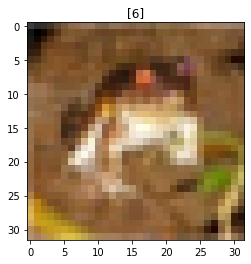

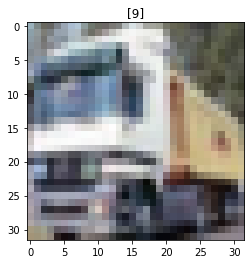

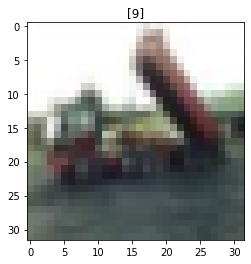

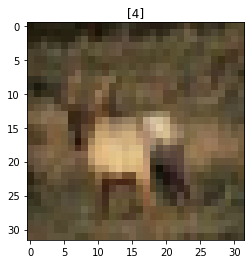

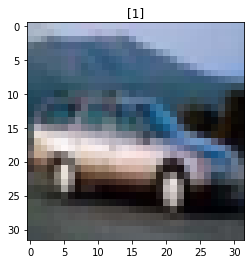

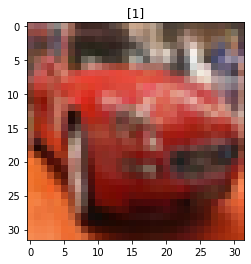

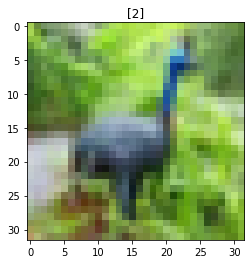

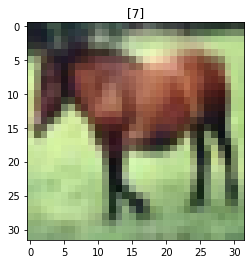

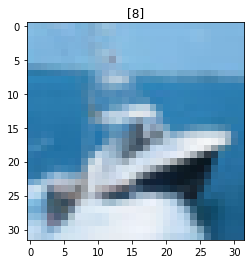

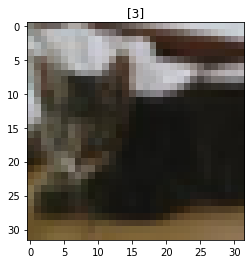

In [31]:
# 첫 10개의 데이터 + 레이블
for i in range(10):
    plt.title(train_y[i])
    plt.imshow(train_x[i])
    plt.show()

# One Hot Encoding

컴퓨터가 이해할 수 있는 형태로 변환해서 Label을 주도록 함

우리가 하고자 하는 것은 classification 이다.  즉 '판정' 을 내리는 것

ex) 개 - 1, 고양이 - 0   <---  컴퓨터가 이해할수 있는 형태로 주어야 한다 (인코딩)

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
to_categorical

<function keras.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [34]:
to_categorical(0,10)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
train_y[0]

array([6], dtype=uint8)

In [36]:
to_categorical(train_y[0], num_classes=10)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

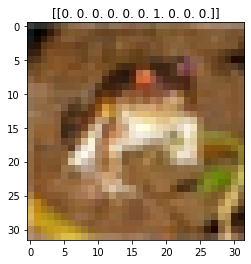

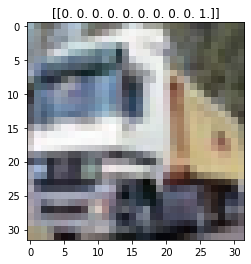

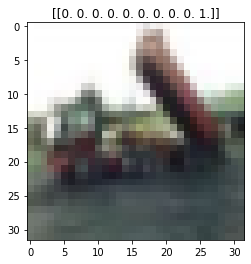

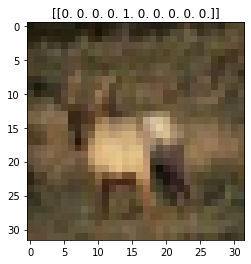

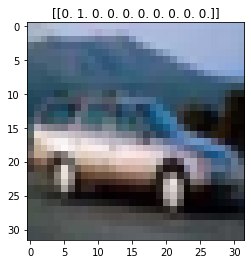

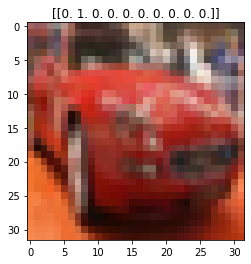

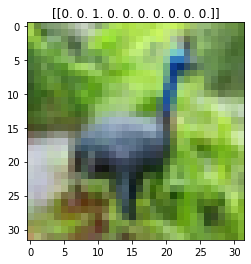

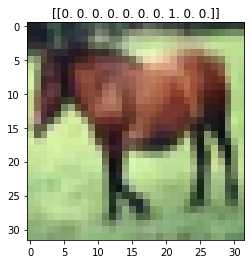

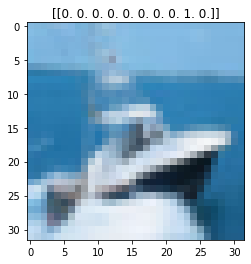

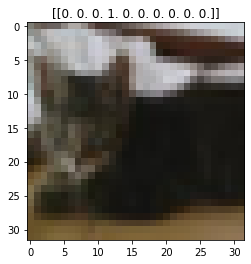

In [39]:
# 위와 같이 one-hot encoding 을 하면
# 모델에 데이터들이 들어갈때마다 
# '5' 대신에 위의 인코딩된 데이터가 들어가게 된다

for i in range(10):
    plt.title(to_categorical(train_y[i], num_classes=10))
    plt.imshow(train_x[i])
    plt.show()

---
# Layer Explanation

In [41]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [43]:
disp.shape

(32, 32, 3)

In [45]:
# 우선 모델을 설계하려면  inpujt 으로 들어갈 데이터의 shape 를 지정해주어야 한다.
input_shape = (32, 32, 3)

# 그리고, 데이터에 대한 class 개수를 지정해주어야 한다.
num_classes = 10

# input  이 필요하다
inputs = layers.Input(shape=input_shape)  # input '입구' 를 만들어줌.

# ▶ Feature Extraction
# [첫번째 Convolution 블럭]
net = layers.Conv2D(32, 3, padding='SAME')(inputs)
net = layers.Activation('relu')(net)

net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)

net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

# [두번째 Convolution 블럭]
net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)

net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)

net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)


# ▶ Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(num_classes)(net)  # num_classed 값! 최종적으로 나오는 값이 10가지 이다.
  #  항상 마지막은 class 개수만큼의 노드를 만들어 줘야 한다.

net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = 'Basic_CNN') # 최초 입력값과 출력지정
model


In [47]:
#  loss function 지정
# 만약 one-hot encoding 을 사용하는 경우
loss = 'categorical_crossentropy'   

loss_func = tf.keras.losses.categorical_crossentropy

In [48]:
# metrics 는 여러개 줄수 있다.  list 형태다!
# metrics = ['accuracy', 'recall', 'precision']   <-- 이와 같이 여러개를 줄수도 있다.

metrics = [tf.keras.metrics.Accuracy()]

In [49]:
optm = tf.keras.optimizers.Adam()
optm

In [50]:
model.compile(optimizer=optm,
              loss=loss_func,
              metrics=metrics)

In [51]:
np.min(train_x), np.max(train_x), np.min(test_x), np.max(test_x)

(0, 255, 0, 255)

In [ ]:
# 위 값의 범위를 rescaling 한다.

# 범위의 값들이 너무 '틔지' 않게 하기 위해.   (255은 너무 확확 커진다
# rescaling 을 해준다.   그래야 학습도 잘 된다.
# rescaling 은 한번 해주도록 하자.

# (0, 255) => (0, 1.0) 사이로 rescaling 해주자!  ( Normalization ..)

In [52]:
train_x = train_x / 255
test_x = test_x / 255
np.min(train_x), np.max(train_x), np.min(test_x), np.max(test_x)

(0.0, 1.0, 0.0, 1.0)

## 학습용 Hyperparameter 설정

- **num_epochs**  :  
    - '전체 데이터(들)'을 '한번' 쭉 보았다면 그게 1 epoch 이다 .   
    - 문제집을 한번 다 풀어보았다면 그것이 한 epoch 다.   
    - 한번 더 보면 epoch 2 이다.  
    - 머신러닝은 수천번 ~ 수십만 epoch 도 본다.


- **batch_size** : 
    - 한 epoch 을 가기 위해서, '한번' 에 보는게 아니라 batch_size 만큼 본다 (메모리 한계 때문이다)  
    - batch_size 만큼 한 모델에 넣어주게 된다.  컴퓨터에서 이미지를 수만개? 이렇게 열어볼수 없다.  
    - 일정개수 열어보고 닫고 다음 이미지들 열어보고, 닫고 를 해야 한다.  
    - 메모리의 효율적인 운용을 위해서 batch_size 를 준다.   
    - 한 모델에 '한번'에 들어가는 데이터의 개수가 batch_size 다! 


In [63]:
num_epoch = 2

In [64]:
batch_size = 32

In [65]:
model.fit(
    train_x, train_y,
    batch_size=batch_size,
    epochs=num_epoch,
    shuffle=True # 반드시 shuffle 을 해주자
)

Epoch 1/2


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
